# Python Data Analysis – Stack Exchange

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Basic Analysis

How many post were made each year ?

In [2]:
# Read the Posts.csv and applying date functionability to the needed columns
posts = pd.read_csv('Posts.csv', parse_dates = ["CreationDate" , "LastEditDate", "LastActivityDate", "ClosedDate"])

In [3]:
# Adding a year column to the Posts table
posts['CreationYear'] = posts['CreationDate'].dt.year
# Grouping the posts by the year column created
posts.groupby('CreationYear')['Id'].count().to_frame().rename(columns = {'Id':'Count'})

,Count
CreationYear,
2011,156
2012,1065
2013,1018


Graph View

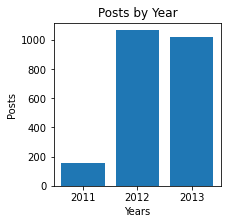

In [4]:
# Visualing the result
visual = posts.groupby('CreationYear')['Id'].count().to_frame().rename(columns = {'Id':'Count'})
x = visual.index
y = visual['Count']
plt.figure(figsize = (3,len(visual['Count'])))
plt.xlabel('Years')
plt.ylabel('Posts')
plt.title('Posts by Year')
plt.bar(x, y, label='Posts')
plt.show()

How many votes were made in each day of the week (Sunday, Monday, Tuesday, etc.) ?

In [5]:
# Read the Votes.csv and applying date functionability to the needed columns
votes = pd.read_csv('Votes.csv', parse_dates = ["CreationDate"])

In [6]:
# Adding a day column to the Votes table
votes['DayOfVote'] = votes['CreationDate'].dt.dayofweek

In [7]:
# Creating a function to change the day "number" to the actual day name
def literalday(day_number):
    DayName = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return DayName[day_number]

In [8]:
# Applying the function
votes['DayOfVote'] = votes['CreationDate'].dt.dayofweek.apply(literalday)

In [9]:
# Counting the votes by day
votes.groupby('DayOfVote')['Id'].count().to_frame().rename(columns = {'Id':'Count'}).sort_values('Count', ascending = False)

,Count
DayOfVote,
Thursday,869
Friday,735
Wednesday,554
Saturday,376
Tuesday,354
Monday,282
Sunday,189


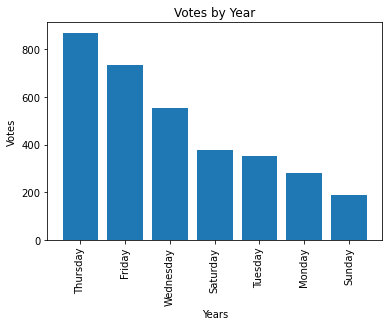

In [10]:
# Visualing the result
visual = votes.groupby('DayOfVote')['Id'].count().to_frame().rename(columns = {'Id':'Count'}).sort_values('Count', ascending = False)
x = visual.index
y = visual['Count']
plt.xlabel('Years')
plt.ylabel('Votes')
plt.title('Votes by Year')
plt.xticks(rotation=90)
plt.bar(x, y, label='Posts')
plt.show()

List all comments created on September 19th, 2012

In [11]:
# Read the Comments.csv and applying date functionability to the needed columns
comments = pd.read_csv('Comments.csv', parse_dates = ["CreationDate"])

In [12]:
mask = comments['CreationDate'].dt.year == 2012
mask2 = comments['CreationDate'].dt.month == 9
mask3 = comments['CreationDate'].dt.day == 19
comments[mask & mask2 & mask3]

,Id,PostId,Text,CreationDate,UserId
1414,3476,887,I had the same thoughts. I'm wondering if ther...,2012-09-19 10:34:12.983,233
1484,3623,890,"hmmm he's described as ""an over-the-top public...",2012-09-19 18:23:37.193,126


List all users under the age of 33, living in London

In [ ]:
# Reading the Users.csv and applying date functionability to the needed columns
users = pd.read_csv('Users.csv', parse_dates = ["CreationDate" , "LastAccessDate"])

In [307]:
# Making masks and applying them
mask = users['Age'] < 33
mask2 = users['Location'].str.contains('London')
users[mask & mask2]

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
27,27,101,2011-11-30 18:58:00.620,Noldorin,2011-12-27 00:54:12.993,http://noldorin.com/,"London, United Kingdom",24.0,<p>entrepreneur; graduate in mathematics / the...,0,0,0
155,160,101,2011-12-04 14:01:19.123,Willbill,2013-02-06 10:19:52.963,NaN,"London, United Kingdom",31.0,NaN,1,6,0
451,473,101,2011-12-29 16:57:11.727,bobble14988,2011-12-29 16:57:11.727,http://www.bobbleworks.co.uk,"London, United Kingdom",26.0,<p>Third year university student who recently ...,0,0,0
679,710,101,2012-01-26 14:06:04.333,wim,2014-09-01 16:18:32.173,http://www.google.com,"London, United Kingdom",32.0,"<p>Hi from London, England! I hope my answers...",0,7,0
686,717,101,2012-01-27 17:26:03.490,JHarris,2012-02-09 14:22:38.973,http://www.johnharris.tv,"London, UK",29.0,NaN,1,0,0
773,819,101,2012-02-10 10:27:35.350,yuji,2012-03-08 17:27:26.723,http://yuji.ly,"London, United Kingdom",30.0,<p>Working on my first indie game (or three).</p>,1,2,0
777,823,101,2012-02-10 14:42:57.733,Edd,2013-08-27 09:37:14.850,http://eddarmitage.com,"London, United Kingdom",25.0,<p>I'm Edd. I'm a Computer Science graduate fr...,0,2,0
974,1039,1654,2012-03-19 10:46:29.743,AlasdairCM,2014-09-12 13:38:03.287,NaN,"London, United Kingdom",32.0,NaN,35,93,7
1097,1174,101,2012-04-16 14:13:16.650,Oliver G,2012-08-08 21:30:52.190,http://olivergwyther.com,"London, UK",26.0,<p>Freelance IT Consultant with experience in ...,2,0,0
1587,1750,101,2012-07-23 18:43:18.690,Alex Florescu,2014-08-21 12:25:32.787,http://www.florescu.org,"London, United Kingdom",27.0,"<p>Build things, break things, have fun.</p> ...",1,3,0


## Advanced Analysis

Display the number of votes for each post title

In [16]:
# Joining Votes with Posts
vp = votes.merge(posts, how = 'inner', left_on = 'PostId', right_on = 'Id').rename(columns = {'Id_x':'VoteId', 'Id_y':'VotePostId', 'CreationDate_x':'VoteCreationDate', 'CreationDate_y':'PostCreationDate'})
# Grouping  the number of votes for each post title
vp.groupby('Title')['VoteId'].count().to_frame().rename(columns={'VoteId':'Count'}).sort_values('Count', ascending=False)

,Count
Title,
Have there been other candidates to play Jack Reacher?,27
Was Disney's The Black Hole the last film to feature an overture?,26
Where did the speaking-disease come from?,26
"In The Departed, did the FBI know about the mole in the police department and did they interfere with the investigation?",25
Why does Harry only make use of time travel in The Prisoner of Azkaban?,23
...,...
Detective Leander Sydnor - What was the point?,1
What's the german quotation in The Sunset Limited?,1
Why did the witch crack like porcelain?,1


Display posts with comments created by users living in the same location as the post creator

In [303]:
users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2011-11-30 17:13:53.160,Community,2011-11-30 17:13:53.160,http://meta.stackexchange.com/,on the server farm,NaN,"<p>Hi, I'm not really a person.</p> <p>I'm a ...",0,1542,1233


In [74]:
comments.head(1)

,Id,PostId,Text,CreationDate,CommentUserId
0,2,1138,"Sure, I edited the question accordingly.",2012-12-19 02:58:04.620,548


In [88]:
# Step 1 - Join Posts with Users to show the OwnerLocation
pu = posts.merge(users, how = 'inner', left_on='OwnerUserId', right_on='Id').rename(columns={'Id_x':'PostId','Location':'OwnerLocation'})[['PostId','OwnerUserId','Title','OwnerLocation']]
# Step 2 - Join Comments with Users to show the CommentorLocation
cu = comments.merge(users, how = 'inner', left_on='CommentUserId', right_on='Id').rename(columns={'Location':'CommentorLocation'})[['PostId','CommentUserId','CommentorLocation']]
# Step 3 - Join Both step 1 & 2
pucu = pu.merge(cu, how='inner', left_on='PostId', right_on = 'PostId')
# Step 4 - Define the mask
mask = pucu['OwnerLocation'] == pucu['CommentorLocation']
# Run
pucu[mask].head()

,PostId,OwnerUserId,Title,OwnerLocation,CommentUserId,CommentorLocation
531,819,52,Was Monk's mother also OCD?,Missouri,52,Missouri
761,1139,1632,Clarification about closing a loop in The Looper,Sweden,293,Sweden
911,952,1312,Thriller about a group of kidnappers wearing S...,"Sydney, Australia",1312,"Sydney, Australia"
946,1440,1590,What is the Traitor's Motive?,Canada,535,Canada
1420,1239,835,Is there more to Gandalf and Galadriel's relat...,Sweden,1221,Sweden


How many users have never voted ?

In [89]:
users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2011-11-30 17:13:53.160,Community,2011-11-30 17:13:53.160,http://meta.stackexchange.com/,on the server farm,NaN,"<p>Hi, I'm not really a person.</p> <p>I'm a ...",0,1542,1233


In [92]:
votes.head(1)

,Id,PostId,CreationDate,UserId,DayOfVote
0,3,1,2011-11-30,231,Wednesday


In [125]:
# Using "EXCEPT" in Pandas to show the number of users that have never voted
mask = ~users['Id'].isin(votes['UserId'])
users[mask]['Id'].count()

355

Display all posts having the highest amount of comments

In [163]:
# Joining Posts with Comments
pc = posts.merge(comments, how='inner', left_on = 'Id', right_on = 'PostId').rename(columns={'Id_x':'PostId','PostId':'CommentPostId'})
# Grouping the Titles by how many commentsfor each post
pcgroup = pc.groupby('Title')['Title'].count().sort_values(ascending=False).to_frame().rename(columns={'Title':'Count'})
# Adding a rank to filter only the highest commented ones
pcgroup['RankCount']=pcgroup['Count'].rank(ascending=False, method='dense')
mask = pcgroup['RankCount'] == 1
pcgroup[mask]


,Count,RankCount
Title,,
How do the 'frozen goods' survive the banana stand fire?,5,1.0
"In Iron Man, why is Tony Stark fooled for so long?",5,1.0
How does the budget breakdown for a US TV season compare to a UK TV Season?,5,1.0
Plot summaries for the other two movies related to Moon,5,1.0
Old movie about two pilots and a cheating wife,5,1.0
Who nukes the USA in The Divide?,5,1.0
Why doesn’t Shosanna try to kill Fredrick?,5,1.0
Aliens took over the satellite,5,1.0
"How much money did it take to run ""The Sting""?",5,1.0


For each post, how many votes are coming from users living in Canada ? What’s their percentage of the total number of votes

In [282]:
# Joining Posts with Votes
pv = posts.merge(votes, how='inner', left_on = 'Id', right_on = 'PostId').rename(columns={'Id_x':'PostId', 'Id_y':'VoteId', 'PostId':'VotePostId'})
# Joining the pv table with Users to show the location of the vote
pv_loc = pv.merge(users, how='inner', left_on = 'UserId', right_on = 'Id')
pv_loc.head(1)
# Making a not null mask to the joined table so I can use "str.contains" later on
masknull = ~pv_loc['Location'].isnull()
pv_loc_nn = pv_loc[masknull]
# Counting world-wide votes
pv_loc_nn_world = pv_loc_nn.groupby('Title')['Location'].count().to_frame().rename(columns={'Location':'WorldLocation'})
# Counting Canada votes
maskcanada = pv_loc_nn['Location'].str.contains('Canada')
pv_loc_nn_canada = pv_loc_nn[maskcanada].groupby('Title')['Location'].count().to_frame().rename(columns={'Location':'CanadaVotes'})
# Joining the Votes counting
pv_loc_nn_join = pv_loc_nn_world.merge(pv_loc_nn_canada, how='left', left_on = 'Title', right_on = 'Title')
# Replacing the Nulls on Canada Votes with a zero number
pv_loc_nn_join['CanadaVotes'].fillna(0, inplace = True) 
# Taking the Percentage as an str and adding '%' to it
pv_loc_nn_join['Percentage'] = (((pv_loc_nn_join['CanadaVotes'] / pv_loc_nn_join['WorldLocation'])*100).round(decimals=2)).astype(str) + '%'
pv_loc_nn_join

,WorldLocation,CanadaVotes,Percentage
Title,,,
"""Road"" picture about guys in a tank, possibly set in the Middle East",4,1.0,25.0%
"""Rock TV"" animated/live action series from the early to mid 80s",3,0.0,0.0%
"""The Club"" where Jerry Seinfeld performed",1,0.0,0.0%
"""There are two kinds of people"" quote",2,0.0,0.0%
'80s Aquaman tv-series?,6,1.0,16.67%
...,...,...,...
Why were the writers trying to play up the Chinese as more advanced than the United States?,2,0.0,0.0%
Would a psychopath create a false positive Voight-Kampff test result?,7,0.0,0.0%
Would special effects for early movie patrons seem real?,5,0.0,0.0%


How many hours in average, it takes to the first comment to be posted after a creation of a new post

In [338]:
# Taking Comments and showing only the first comment made
comments_min = comments.groupby('PostId')['CreationDate'].min().to_frame()
# # Joining Posts with comments_min 
pc_creation = posts.merge(comments_min, how='inner', left_on = 'Id', right_index = True).rename(columns={'CreationDate_x':'PostCreationDate','CreationDate_y':'CommentCreationDate'})[['Id','PostCreationDate','CommentCreationDate']]
# Extracting the Difference
pc_creation['Difference'] = pc_creation['CommentCreationDate']-pc_creation['PostCreationDate']
# Changing the difference to hours and rounding the result
pc_creation['Difference'] = (pc_creation['Difference']/np.timedelta64(1,'h')).round()
# Averaging the whole table on Difference column
pc_creation['Difference'].mean().round()

7.0

Whats the most common post tag ?

In [367]:
# Creating a split in the posts['Tags'], split by >< chars
tags_list = list(posts['Tags'].str.split('><'))
# Creating an empty list to input all the Tags names in a list
empty_list = []
# Creating 2 for loops to input the specific Tags in the Empty_List
for name in tags_list:
    for word in name:
        empty_list.append(word)
# Creating a dataframe by using the "pd.Series" command, that contains all of the Tags, removing the chars ">" and "<" that are not needed
df = pd.Series(empty_list).str.replace("<","").str.replace(">","").to_frame()
# Giving the only column created an actual name
df.columns = ['Tag']
# Grouping by the specific Tag, and filtering the highest result
df.groupby('Tag')['Tag'].count().sort_values(ascending=False).to_frame().head(1)

,Tag
Tag,
plot-explanation,665


Create a pivot table displaying how many posts were created for each year (Y axis) and each month (X axis)

In [368]:
posts.head(1)

,Id,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,ClosedDate,CreationYear
0,1,2011-11-30 19:15:54.070,25,1526,<p>Some comedian/actors are given creative fre...,1562,532,2013-09-25 14:15:14.257,2013-09-25 14:15:14.257,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2011-12-24 19:15:54.070,2011


In [399]:
# Creating a Creation Year and Creation Month Columns
posts['CreationYear'] = posts['CreationDate'].dt.year
posts['CreationMonth'] = posts['CreationDate'].dt.month
# Grouping the table by CreationYear, CreationMonth and Id
posts_group = posts.groupby(['CreationYear', 'CreationMonth'])['Id'].count().to_frame()
# Creating the Pivot
posts_group.pivot_table(index = 'CreationYear', columns = 'CreationMonth', values = 'Id')

CreationMonth,1,2,3,4,5,6,7,8,9,10,11,12
CreationYear,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15.0,140.0
2012,92.0,72.0,62.0,88.0,93.0,105.0,105.0,81.0,60.0,75.0,77.0,155.0
2013,129.0,99.0,107.0,92.0,130.0,120.0,134.0,143.0,64.0,NaN,NaN,NaN
